In [ ]:
# Import the dependencies.  6.1.4

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from citipy import citipy


import requests

# Import the API key.
from config import weather_api_key

# Import linregress
from scipy.stats import linregress

In [ ]:
# Create a set of random latitude and longitude combinations.  6.1.4
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list. 6.1.4
coordinates = list(lat_lngs)
coordinates

[(-50.39685078354747, -22.44887401040458),
 (12.471592328144936, 92.23077943252048),
 (89.47174047828867, -27.19487900281672),
 (-69.2099957514193, -30.245573029929034),
 (1.0026846661217093, -102.03153430339017),
 (-70.44605159133368, 70.7114870476837),
 (17.320233438518557, 175.28902083586604),
 (53.28323154202812, 14.02693164630395),
 (60.74148749830323, -171.2174291912694),
 (65.44409876564839, -105.450774865471),
 (-49.57302196913777, -95.1276991619862),
 (-88.29750557585047, 128.72175093963062),
 (-74.06087963809738, 48.625773063829314),
 (57.56681778120728, -34.543446373078325),
 (36.300876418554324, -160.013070817041),
 (-24.13513740787316, -11.668308272877368),
 (23.316368406640024, -26.723223328012722),
 (-55.61906020670544, -133.74665899369043),
 (47.75562539597428, 89.81112488630123),
 (-44.70907810955158, 129.31935860243067),
 (53.285086626901006, -99.85407340521728),
 (-59.974531018162, -150.84721986464803),
 (-22.763935642337145, 71.71418771363975),
 (-63.574333464209964

In [5]:
# Create a list for holding the cities. 6.1.5
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Import the time library and the datetime module from the datetime library 6.2.6
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
requests.get(url + "&q=Boston")

<Response [200]>

In [10]:
# Loop through all the cities in the list. 6.2.6
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        #print("getting data for city")
        city_weather = requests.get(city_url).json()
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | prenzlau
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | altay
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | the pas
Processing Record 22 of Set 1 | mataura
Processing Record 

Processing Record 38 of Set 4 | lephepe
City not found. Skipping...
Processing Record 39 of Set 4 | izhma
Processing Record 40 of Set 4 | narsaq
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | mentok
City not found. Skipping...
Processing Record 43 of Set 4 | waipawa
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | matara
Processing Record 46 of Set 4 | bogo
Processing Record 47 of Set 4 | baykit
Processing Record 48 of Set 4 | nemuro
Processing Record 49 of Set 4 | vaini
Processing Record 50 of Set 4 | saldanha
Processing Record 1 of Set 5 | mackay
Processing Record 2 of Set 5 | honningsvag
Processing Record 3 of Set 5 | terrace
Processing Record 4 of Set 5 | hermanus
Processing Record 5 of Set 5 | rio gallegos
Processing Record 6 of Set 5 | san roque
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | airai
Processing Record 9 of Set 5 | faanui
Processing Record 10 of Set 5 | yanan


Processing Record 27 of Set 8 | tepepa
Processing Record 28 of Set 8 | phangnga
Processing Record 29 of Set 8 | fairbanks
Processing Record 30 of Set 8 | jiazi
Processing Record 31 of Set 8 | kalmunai
Processing Record 32 of Set 8 | pisco
Processing Record 33 of Set 8 | avera
Processing Record 34 of Set 8 | wanning
Processing Record 35 of Set 8 | lardos
Processing Record 36 of Set 8 | kapit
Processing Record 37 of Set 8 | zarubino
Processing Record 38 of Set 8 | tungkang
City not found. Skipping...
Processing Record 39 of Set 8 | olinda
Processing Record 40 of Set 8 | upernavik
Processing Record 41 of Set 8 | kostomuksha
Processing Record 42 of Set 8 | te anau
Processing Record 43 of Set 8 | colimes
Processing Record 44 of Set 8 | rahimatpur
Processing Record 45 of Set 8 | guerrero negro
Processing Record 46 of Set 8 | multai
Processing Record 47 of Set 8 | burnie
Processing Record 48 of Set 8 | san rafael
Processing Record 49 of Set 8 | clyde river
Processing Record 50 of Set 8 | siou

Processing Record 14 of Set 12 | higuey
City not found. Skipping...
Processing Record 15 of Set 12 | jumla
Processing Record 16 of Set 12 | spassk-ryazanskiy
Processing Record 17 of Set 12 | pecanha
Processing Record 18 of Set 12 | coolum beach
Processing Record 19 of Set 12 | punta alta
Processing Record 20 of Set 12 | azul
Processing Record 21 of Set 12 | kirillov
Processing Record 22 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 23 of Set 12 | aksarka
Processing Record 24 of Set 12 | saint george
Processing Record 25 of Set 12 | jiaohe
Processing Record 26 of Set 12 | mahanoro
Processing Record 27 of Set 12 | tekeli
Processing Record 28 of Set 12 | whitehorse
Processing Record 29 of Set 12 | kroya
Processing Record 30 of Set 12 | lakes entrance
Processing Record 31 of Set 12 | jeremoabo
Processing Record 32 of Set 12 | sechura
Processing Record 33 of Set 12 | berlevag
Processing Record 34 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 35 o

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame. 6.2.7
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,75.06,78,75,19.57,BR,2021-11-20 16:22:36
1,Port Blair,11.6667,92.7500,81.73,86,66,13.06,IN,2021-11-20 16:27:22
2,Ushuaia,-54.8000,-68.3000,44.22,70,75,40.29,AR,2021-11-20 16:23:48
3,Puerto Ayora,-0.7393,-90.3518,76.96,74,83,10.31,EC,2021-11-20 16:27:23
4,Butaritari,3.0707,172.7902,81.91,66,97,14.12,KI,2021-11-20 16:27:23
5,Prenzlau,53.3167,13.8667,54.21,71,100,17.09,DE,2021-11-20 16:27:23
6,Provideniya,64.3833,-173.3000,9.28,57,13,4.65,RU,2021-11-20 16:27:24
7,Yellowknife,62.4560,-114.3525,0.28,85,75,9.22,CA,2021-11-20 16:27:24
8,Castro,-24.7911,-50.0119,73.00,57,75,4.94,BR,2021-11-20 16:27:21
9,New Norfolk,-42.7826,147.0587,51.30,81,76,2.62,AU,2021-11-20 16:27:24


In [13]:
# Create the output file (CSV). 6.2.7
output_data_file = "weather_data/cities.csv"

In [5]:
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

# when restart file, instead of creating new cities, import cvs file

In [6]:
city_data_df = "weather_data/cities.csv"

In [8]:
city_data_df = pd.read_csv(city_data_df)

In [9]:
city_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Arraial Do Cabo,-22.9661,-42.0278,75.06,78,75,19.57,BR,2021-11-20 16:22:36
1,1,Port Blair,11.6667,92.7500,81.73,86,66,13.06,IN,2021-11-20 16:27:22
2,2,Ushuaia,-54.8000,-68.3000,44.22,70,75,40.29,AR,2021-11-20 16:23:48
3,3,Puerto Ayora,-0.7393,-90.3518,76.96,74,83,10.31,EC,2021-11-20 16:27:23
4,4,Butaritari,3.0707,172.7902,81.91,66,97,14.12,KI,2021-11-20 16:27:23
...,...,...,...,...,...,...,...,...,...,...
563,563,Devils Lake,48.1128,-98.8651,28.94,81,1,5.01,US,2021-11-20 16:41:32
564,564,Atherton,53.5237,-2.4935,53.78,91,93,5.99,GB,2021-11-20 16:41:32
565,565,Sembakung,3.8167,117.2500,78.73,99,74,0.92,ID,2021-11-20 16:41:32
566,566,Petropavlovsk-Kamchatskiy,53.0452,158.6483,34.39,93,90,33.55,RU,2021-11-20 16:41:32


# scattered diagram

In [10]:
# Extract relevant fields from the DataFrame for plotting. 6.3.1
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

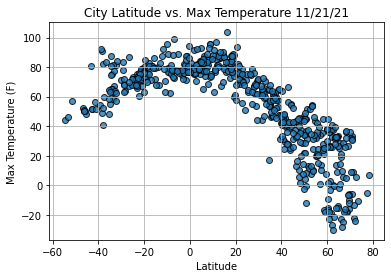

In [11]:
# Import time module 6.3.1
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

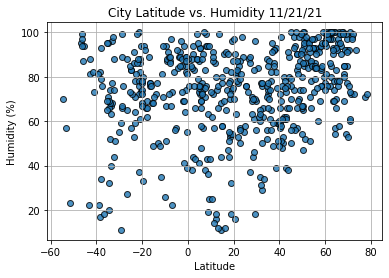

In [12]:
# Build the scatter plots for latitude vs. humidity. 6.3.2
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

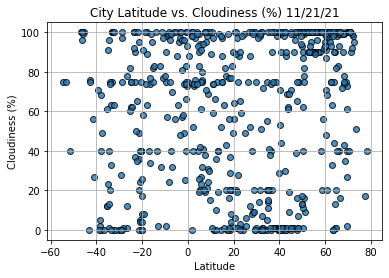

In [13]:
# Build the scatter plots for latitude vs. cloudiness. 6.3.3
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

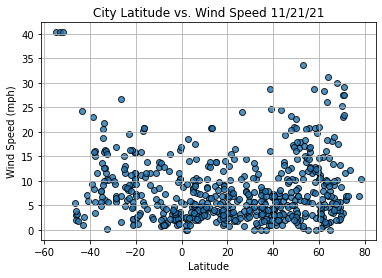

In [14]:
# Build the scatter plots for latitude vs. wind speed. 6.3.3
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear Regression 6.4.2

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept   # y = mx +b
    
    # Get the equation of the line. (this is just for a display purpose  plt.annotate)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red") # (this is just for a display purpose)
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Linear Regression - Create the Northern and Southern Hemisphere DataFrames 6.4.2

In [16]:
row = city_data_df.loc[8]
print(row)

City_ID                         8
City                       Castro
Lat                      -24.7911
Lng                      -50.0119
Max Temp                     73.0
Humidity                       57
Cloudiness                     75
Wind Speed                   4.94
Country                        BR
Date          2021-11-20 16:27:21
Name: 8, dtype: object


In [17]:
city_data_df["Lat"]>=0

0      False
1       True
2      False
3      False
4       True
       ...  
563     True
564     True
565     True
566     True
567     True
Name: Lat, Length: 568, dtype: bool

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,Port Blair,11.6667,92.7500,81.73,86,66,13.06,IN,2021-11-20 16:27:22
4,4,Butaritari,3.0707,172.7902,81.91,66,97,14.12,KI,2021-11-20 16:27:23
5,5,Prenzlau,53.3167,13.8667,54.21,71,100,17.09,DE,2021-11-20 16:27:23
6,6,Provideniya,64.3833,-173.3000,9.28,57,13,4.65,RU,2021-11-20 16:27:24
7,7,Yellowknife,62.4560,-114.3525,0.28,85,75,9.22,CA,2021-11-20 16:27:24


In [19]:
# Create Northern and Southern Hemisphere DataFrames. 6.4.2
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [20]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Maximum Temperature  :  Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere & Southern  6.4.2

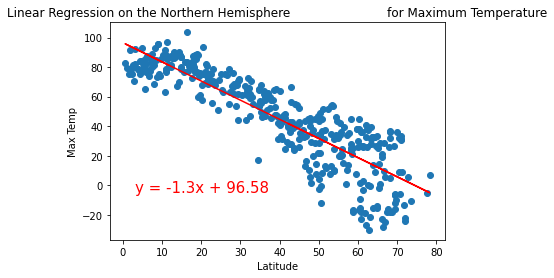

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(3,-5))

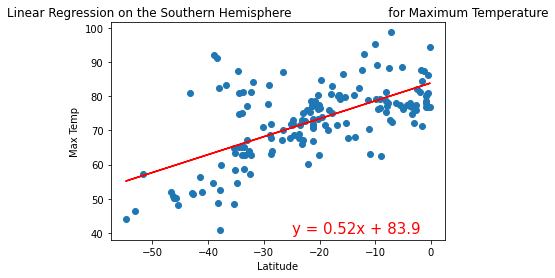

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-25,40))



# Humidity  :  Perform Linear Regression on the Humidity for the Northern Hemisphere & Southern  6.4.3

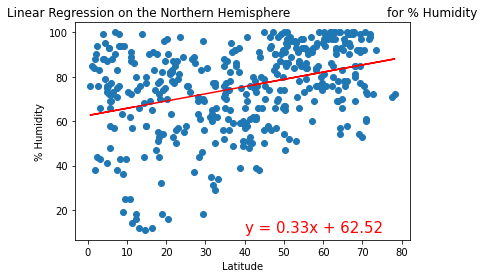

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

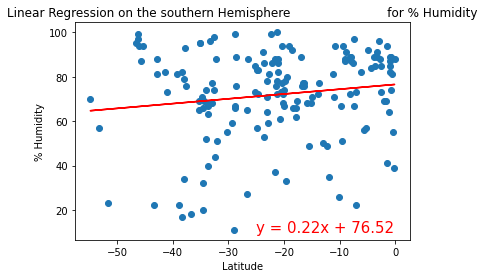

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,10))

# Cloudiness  :  Perform Linear Regression on the Cloudiness for the Northern Hemisphere & Southern  6.4.4

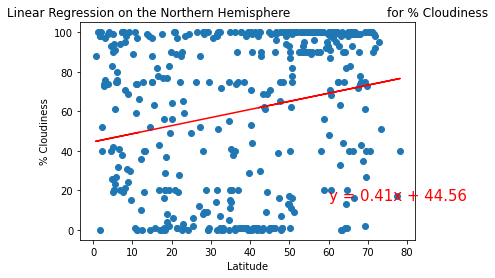

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(60,15))

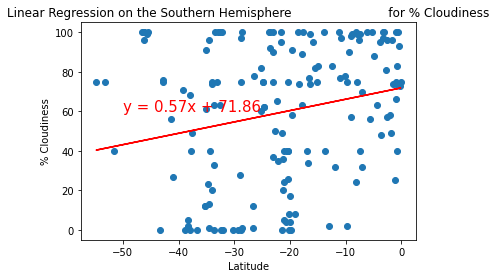

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

# Wind Speed  :  Perform Linear Regression on the Wind Speed for the Northern Hemisphere & Southern  6.4.4

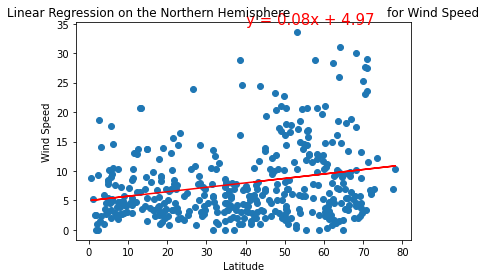

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

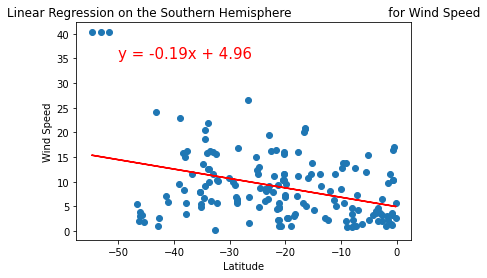

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))